# Hackacity 2024
## [SOLUTION NAME]
#### Team: RubberDuckies
#### Authors:
- Francisco Vieira
- Jennifer Oliveira
- Luis Pereira
- Pedro Mota

# Instructions    RETIRAR DEPOIS
- The purpose of this notebook is to provide a detailed description so that the technical and business jury can have an overview of the technical and non-technical aspects and how they interconnect.
- To use the template, you must make a copy and fill in the team name and the challenge title.
- The cells containing the instructions should be deleted, but all headers must be kept.
- All technical information should be included in this report (e.g., code, queries, graphs, tools used, parameters, etc.). If necessary, additional files can be added to the OneDrive folder, with references to those files included in this report.

# Tip
- The technical and business jury will need to evaluate several notebooks, so it’s important to maintain a clear line of thought within the notebook without overloading it with too many similar graphs or visuals that do not add value to the work. On the other hand, it’s important to show that the work done is thorough.
- Therefore, we recommend using the annex section to include code that was produced along with its description but might be unnecessary noise for the jury (e.g., tested models that didn’t work, EDA with very similar results between variables, etc.).


# 1 - Introduction


### Instructions:    RETIRAR DEPOIS
Contextualization and explanation of the problem and the proposed solution. Should only contain text or text and images.

# 2 - Possible threat analysis before anonymization

### Instructions:    RETIRAR DEPOIS
This section should cover a threat analysis of the dataset from the privacy perspective and it's quantification.

Important notes:
- Only this section is evaluated for the data privacy award;
- No code is needed for this section;
- A good quantification of the threat is valuade by the jury;
- Include any references that is important.

Before anonymization, we find that several categories of data can be used to directly identify the user (MAC address) or detect paterns that leads to identfying the user

- macadres
- start time of connec
- duration of connec

# 3 - Anonymization process

### Instructions    RETIRAR DEPOIS

Based on the previous threat assesment, propose any anonymization techniques you might find helpful.

Include all the code and proof needed that the threat has been mitigated.

We propose anonymizing user data by adding noise to their MAC addresses before securely hashing them.

In [ ]:
def hash_sensitive_data(data, salt=None):
    if not salt:
        salt = os.urandom(16)
    salted_data = salt.hex() + str(data)
    hashed = hashlib.sha256(salted_data.encode()).hexdigest()
    return hashed

# 4 - Possible threat analysis after anonymization

### Instructions    RETIRAR DEPOIS

Not all solutions are perfect - Do a threat analysis and compare the threats before and after your solution.

Since we created a list of data noise to add to mac addresses, that list now has become a liability, in case of a security breach, it can be used to discover the hash key and then, the user data.

# 5 - Data potential and analysis

### Instructions    RETIRAR DEPOIS

It is typical that during an anonymization process, there is a loss of value in terms of insights. In this section, explore the other side of the scale - What can still be done with the data that is processed and why is the risk above justifiable taking into account the potential return?

Specifically, try to imagine yourself as the city's analytics team, which uses this data to gather conclusions about the city's state and flow and try develop and demonstrate what results and analyses can be done. You can use the given data plus optionally any other data sources. If you complement with additional datasets, be it from the city Open Data Portal (https://opendata.porto.digital) or other datasets, make sure you cite and reference them explicitly.



Even after anonymization, we can analyze the average number of connections per access point on specific days, identifying overloaded points and determining if support is needed.

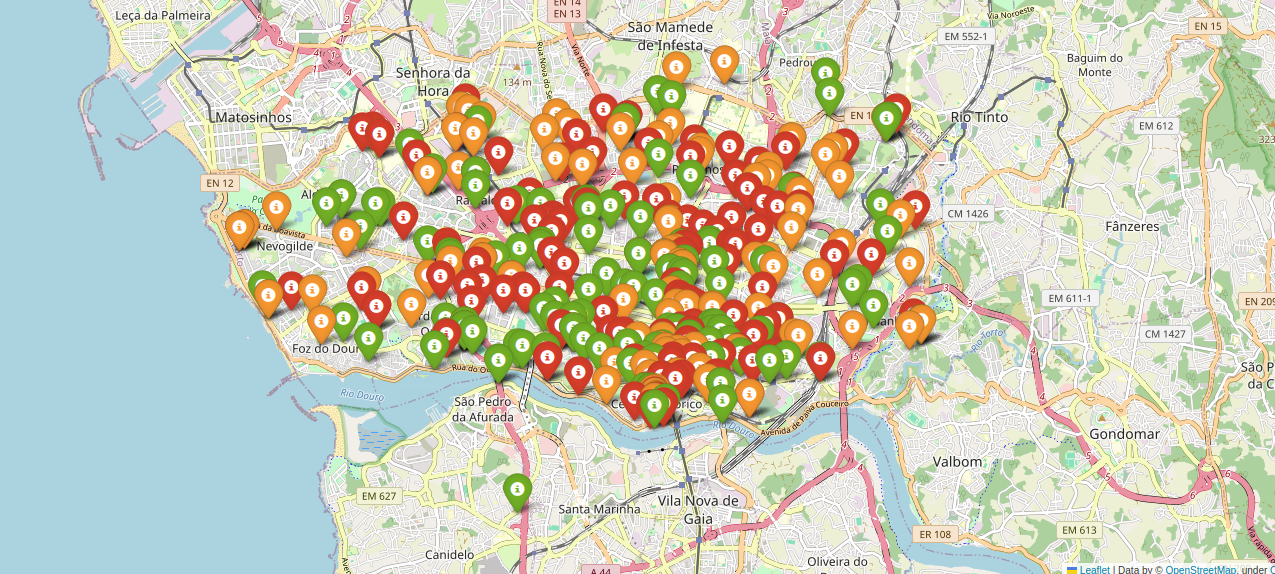

In [ ]:
if not df.empty:
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    mymap = folium.Map(location=map_center, zoom_start=13.2)
    for index, row in df.iterrows():
        if (row['quantity'] > 5):
            color = 'red'
        elif (row['quantity'] < 3):
            color = 'orange'
        else:
            color = 'green'
        icon = folium.Icon(color=color)
        folium.Marker(location=[row['latitude'], row['longitude']],
                      popup=row['subCategory'], icon=icon).add_to(mymap)
    mymap.save('map.html')

# 5 - Conclusions and Future Work


### Instructions    RETIRAR DEPOIS:

List the main conclusions focusing on the feasibility, innovation, and applicability of the solution.

In addition, describe the future work still necessary if this solution were to continue: What would the next steps be? What limitations do the data have for implementing the solution? How can the data be improved? How could this solution be improved? What other ideas could be included/analyzed? What other types of data could be used? What other methodologies could be experimented with?

- We found some information that could be used to detect user paterns that can identify them.
- By having that data anonymized, that risk disappears but there's still value to the information.
- With what remains after treatment, a study of access points usage and importance can be obtained.
- Having historical data of the access points, will allow us to create a machine learning model to predict peaks of users and prepare accordingly.

# 6 - References

- [Porto Digital: Access Points Localization](https://opendata.porto.digital/dataset/localizacao-dos-pontos-de-acesso-rede-free-wifi/resource/9d3a28c6-c106-4739-883a-bdfcd7715bca)

# 9 - Annex

app.ipynb:

In [ ]:
import pandas as pd
import hashlib
import os

wifi_data = pd.read_csv("/Hackacity2024Data/hackacity_wifi_data.csv")

def hash_sensitive_data(data, salt=None):
    if not salt:
        salt = os.urandom(16)
    salted_data = salt.hex() + str(data)
    hashed = hashlib.sha256(salted_data.encode()).hexdigest()
    return hashed

wifi_data['callingstationid'] = wifi_data['callingstationid'].apply(hash_sensitive_data)
wifi_data['acctstarttime'] = wifi_data['acctstarttime'].apply(hash_sensitive_data)
wifi_data['acctsessiontime'] = wifi_data['acctsessiontime'].apply(hash_sensitive_data)

wifi_data.to_csv("/Hackacity2024Data/updated_hackacity_wifi_data.csv", index=False)

print("Trinity applied successfully.")

3month_check.ipynb:

In [ ]:
import openpyxl
import csv
from datetime import datetime, timedelta
def delete_old_rows_csv(file_path, date_column):
    """
    Deletes rows where the date in the specified column is 3 months old or more.

    :param file_path: Path to the CSV file.
    :param date_column: Column index containing the date (0-based index).
    """
    today = datetime.today()
    cutoff_date = today - timedelta(days=90)

    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        rows = [next(reader) for _ in range(200)]
    data_rows = rows[1:]
    filtered_rows = []
    for row in data_rows:
        try:
            date_value = datetime.strptime(row[2], "%Y-%m-%d %H:%M:%S")
            if date_value > cutoff_date:
                filtered_rows.append(row)
        except ValueError:
    
            filtered_rows.append(row)
    with open(file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(rows[0])
        writer.writerows(filtered_rows)
file_path = "/Hackacity2024Data/hackacity_wifi_data.csv"
date_column = 2
delete_old_rows_csv(file_path, date_column)

map.ipynb:

In [ ]:
import folium
import pandas as pd

df = pd.read_csv('../Hackacity2024Data/treated.csv')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df = df.dropna(subset=['latitude', 'longitude', 'quantity'])
if not df.empty:
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    mymap = folium.Map(location=map_center, zoom_start=13.2)
    for index, row in df.iterrows():
        if (row['quantity'] > 5):
            color = 'red'
        elif (row['quantity'] < 3):
            color = 'orange'
        else:
            color = 'green'
        icon = folium.Icon(color=color)
        folium.Marker(location=[row['latitude'], row['longitude']],
                      popup=row['subCategory'], icon=icon).add_to(mymap)
    mymap.save('map.html')
    print("Map saved to map.html")
else:
    print("No valid coordinates found in the CSV.")